# Data Preprocessing

#### Importing Libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Loading Dataset

In [15]:
augmented_data = pd.read_csv('Augmented_Data.csv')

#### Preparing features and target

In [16]:
X = augmented_data.drop(columns=['prognosis'])
y = augmented_data['prognosis']

#### Spliting into training and testing sets (80% train, 20% test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

#### Using Decision Tree Classifier Model

In [18]:
model = DecisionTreeClassifier(random_state=42, max_depth=50)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

#### Making Prediction on the test data

In [19]:
y_pred = model.predict(X_test)

#### Evaluating the model

In [20]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#### Printing the evaluation results

In [21]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9645121951219512

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.99      1.00       213
                                   AIDS       1.00      0.98      0.99       220
                                   Acne       1.00      0.98      0.99       193
                    Alcoholic hepatitis       1.00      0.84      0.91       212
                                Allergy       1.00      0.99      1.00       221
                              Arthritis       1.00      0.99      1.00       197
                       Bronchial Asthma       1.00      1.00      1.00       189
                   Cervical spondylosis       1.00      0.98      0.99       211
                            Chicken pox       1.00      1.00      1.00       186
                    Chronic cholestasis       0.42      1.00      0.59       211
                            Common Cold       1.00    

# Visualizing the Model

#### Importing Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Symptom Frequency Plot

C:\Users\daans\AppData\Local\Temp\ipykernel_23396\2994103934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")


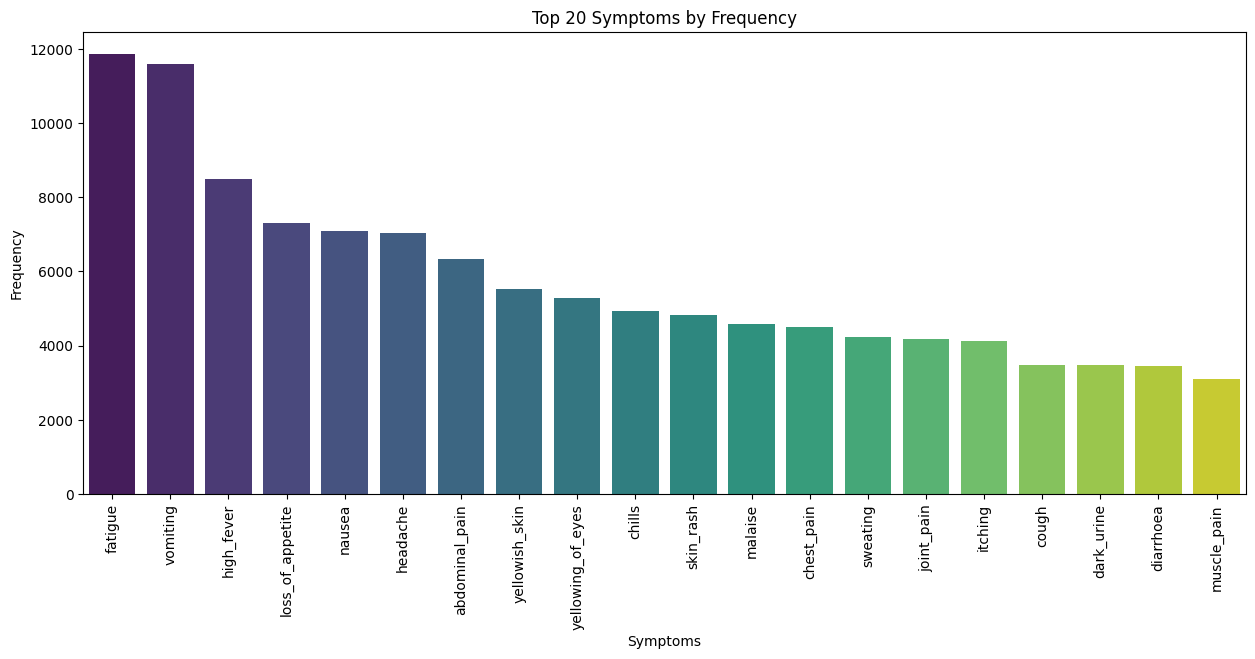

In [23]:
plt.figure(figsize=(15, 6))
symptom_counts = X_train.sum().sort_values(ascending=False).head(20)  # Top 20 symptoms by frequency
sns.barplot(x=symptom_counts.index, y=symptom_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 20 Symptoms by Frequency")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.show()

#### Feature Importance Plot (only for Decision Tree or Random Forests)

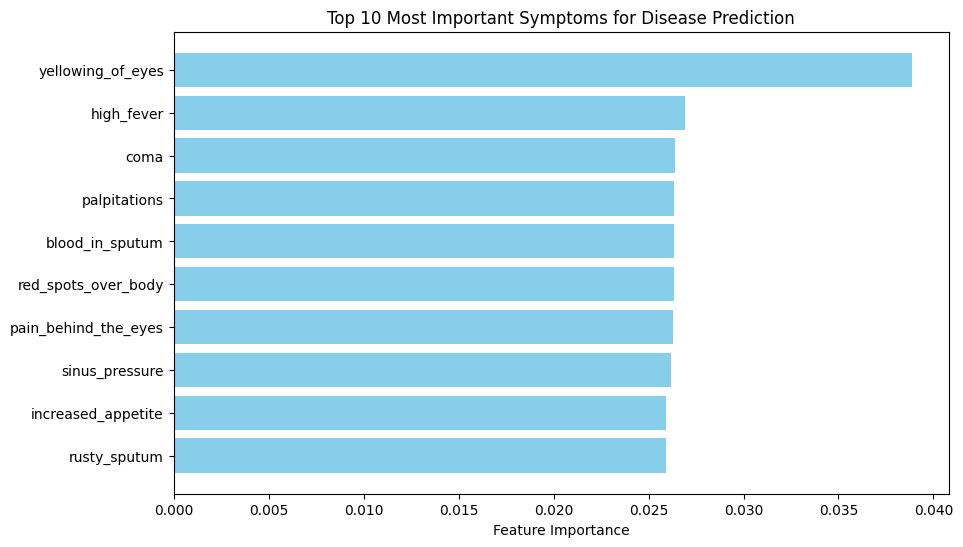

In [24]:
# This code assumes you used a Decision Tree model
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color="skyblue", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 10 Most Important Symptoms for Disease Prediction")
plt.xlabel("Feature Importance")
plt.show()

#### Confusion Matrix

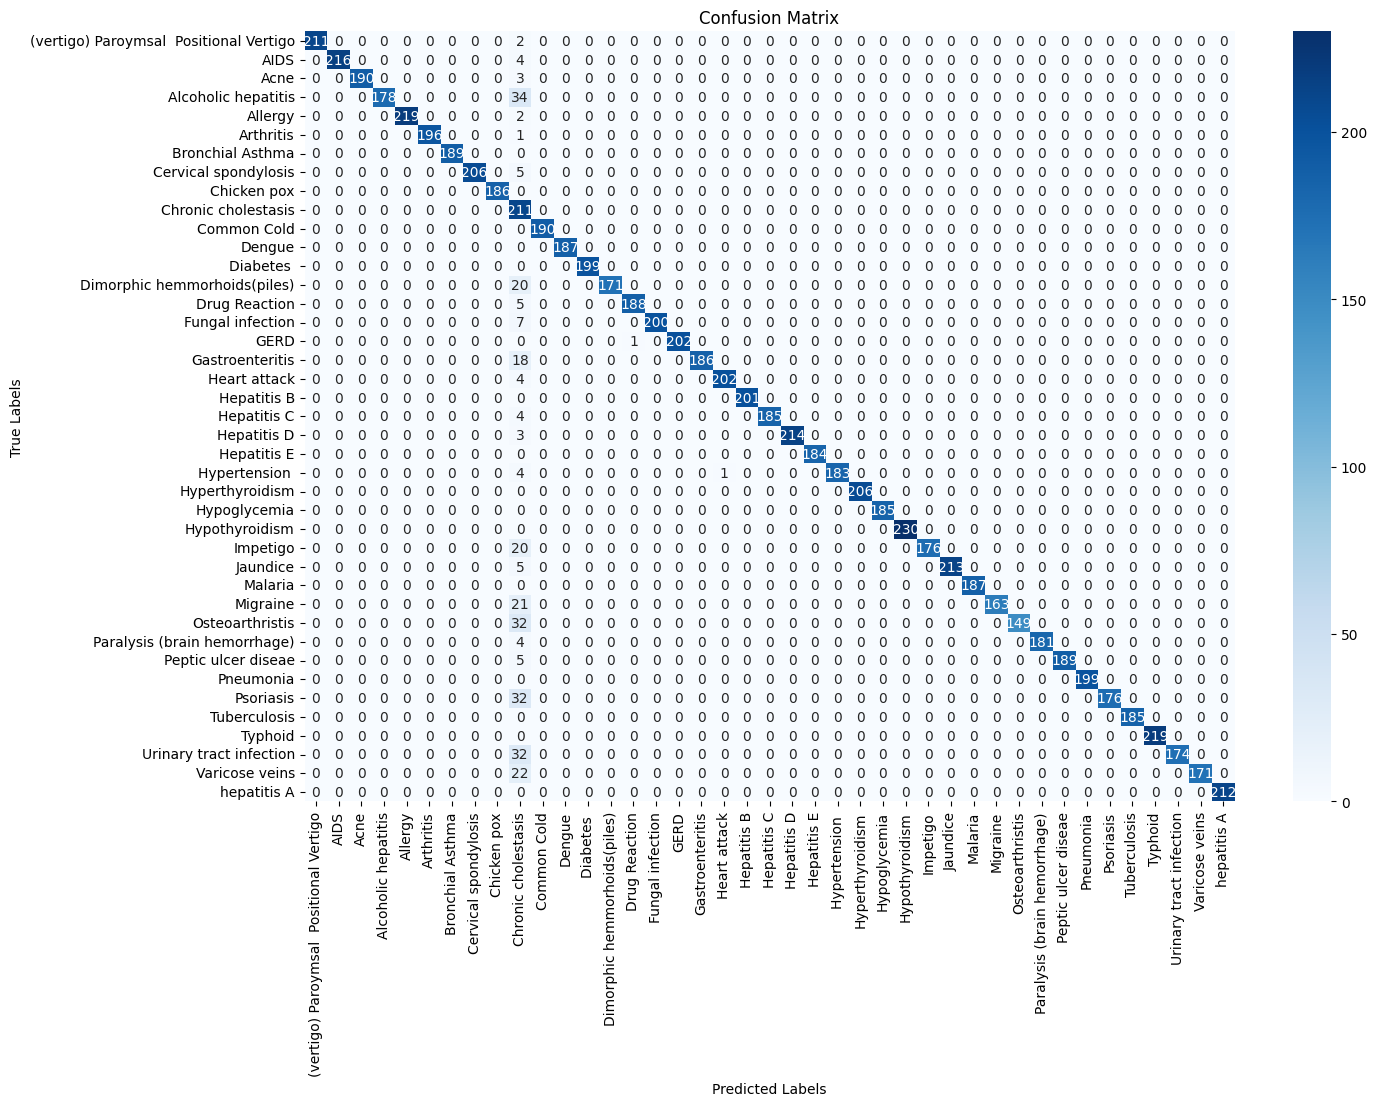

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Saving Model

In [26]:
import joblib
joblib.dump(model, 'final_model1.joblib')


['final_model1.joblib']